In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:

heightImg = 297
widthImg  =210

#READ IMAGES
img1 = cv.imread("g.jpeg")
img1 = cv.resize(img1, (600,400))
img2 = cv.imread("c.jpeg")
img2 = cv.resize(img2, (600,400))

#CONVERT IMAGES TO GRAYSCALE
imgGray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2Gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

#BLUR IMAGES
imgBlur = cv.GaussianBlur(imgGray, (5, 5), 1) 
imgBlur2 = cv.GaussianBlur(img2Gray, (5,5),1)


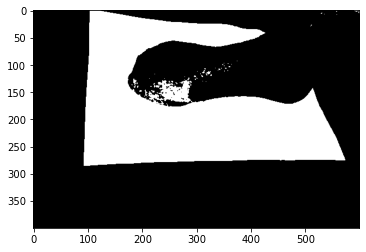

In [4]:
#APPLY BINARY THRESHOLD AND SHOW IMAGE
ret, thresh_img = cv.threshold(imgBlur, 136, 255, cv.THRESH_BINARY)
plt.imshow(thresh_img, cmap='gray')

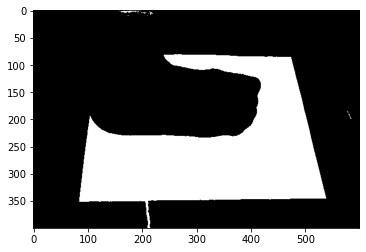

In [5]:
ret, thresh_img2 = cv.threshold(imgBlur2, 160, 255, cv.THRESH_BINARY)
plt.imshow(thresh_img2, cmap='gray')

# IMAGE PREPROCESSING

In [6]:
thres= 80, 285 
thres2= 160, 280

 # APPLY CANNY BLUR
imgThreshold = cv.Canny(thresh_img,thres[0],thres[1])
imgThreshold2 = cv.Canny(thresh_img2,thres2[0],thres2[1])
kernel = np.ones((5, 5))


#HELP REMOVE NOISE
imgDial = cv.dilate(imgThreshold, kernel, iterations=1) # APPLY DILATION
imgThreshold = cv.erode(imgDial, kernel, iterations=1)  # APPLY EROSION

imgDial2 = cv.dilate(imgThreshold2, kernel, iterations=1) # APPLY DILATION
imgThreshold2 = cv.erode(imgDial2, kernel, iterations=1)  # APPLY EROSION

imgContours =  thresh_img.copy()
imgContours2 =  thresh_img2.copy()



In [7]:
# FIND ALL CONTOURS FOR THE 1ST IMAGE
contours, hierarchy = cv.findContours(imgThreshold, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) 

In [8]:
#FUNCTION TO GET THE FOUR POINTS
def getP(contour, img):
    for cnt in contour:
        area = cv.contourArea(cnt)
        if area>100:
            a =cv.drawContours(img, cnt, -1, (0, 255, 0), 4) # DRAW ALL DETECTED CONTOURS
            peri = cv.arcLength(cnt, True)
            approx = cv.approxPolyDP(cnt, 0.02*peri, True)
            #print(len(approx))

            rec = cv.minAreaRect(approx)
            box = cv.boxPoints(rec)
            box = np.int0(box)
            srcP = np.array([box[0], box[1], box[2], box[3]])
            #print(srcP)
            #b = cv.drawContours(imgGray, [box], 0,(0,0,255),2)
    return srcP
            #x_, y_, w, h = cv.boundingRect(approx)
            #print(x_, y_, w, h)
            #b = cv.rectangle(imgGray, (x_,y_), (x_+ w, y_+ h), (0,255,0), 5)

            #cv.imshow('gr', b)
            #cv.waitKey(0)
            #cv.destroyAllWindows()

In [9]:
def reorder(myPoints):
 
    myPoints = myPoints.reshape((4, 2))
    myPointsNew = np.zeros((4, 1, 2), dtype=np.int32)
    add = myPoints.sum(1)
 
    myPointsNew[0] = myPoints[np.argmin(add)]
    myPointsNew[3] =myPoints[np.argmax(add)]
    diff = np.diff(myPoints, axis=1)
    myPointsNew[1] =myPoints[np.argmin(diff)]
    myPointsNew[2] = myPoints[np.argmax(diff)]
 
    return myPointsNew

In [10]:
srcP1 = getP(contours, imgContours)
#print(srcP1)
srcP = np.array([[95 ,283],[88  , 0], [570 ,272], [563 ,-10] ])
#print(srcP)
destP = np.int0([[0, 0],[widthImg, 0], [0, heightImg],[widthImg, heightImg]]) # PREPARE POINTS FOR WARP
#print(destP)

[[ 95 283]
 [ 88   0]
 [570 272]
 [563 -10]]
[[  0   0]
 [210   0]
 [  0 297]
 [210 297]]


In [11]:
H, _ = cv.findHomography(srcP, destP)
imgWarp = cv.warpPerspective(thresh_img, H, (widthImg, heightImg))

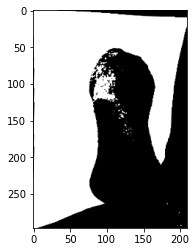

In [12]:
plt.imshow(imgWarp, cmap='gray')

In [14]:
# FIND ALL CONTOURS FOR THE SECOND IMAGE
contours2, hierarchy2 = cv.findContours(imgThreshold2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) 

In [15]:
#srcP2 = getP(contours2, imgContours2)
#print(srcP2)
#srcP2_ = reorder(srcP2)
#srcP2 = reorder(srcP2_)
#print(srcP2)
srcs = np.array([[486 , 42],[ 535 ,343], [46 ,114], [95 ,414] ])


[[  0   0]
 [210   0]
 [  0 297]
 [210 297]]


In [16]:
H2, _ = cv.findHomography(srcs, destP)
imgWarp2 = cv.warpPerspective(thresh_img2, H2, (widthImg, heightImg))

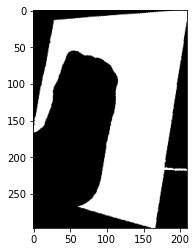

In [17]:
plt.imshow(imgWarp2, cmap='gray')

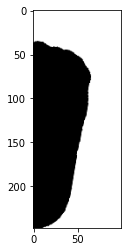

In [18]:
imgc = imgWarp2[20:268, 50:150]
plt.imshow(imgc, cmap='gray')

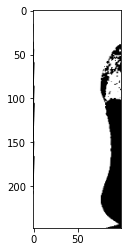

In [31]:
imgc2= imgWarp[20: 268, 0:100]
plt.imshow(imgc2, cmap='gray')

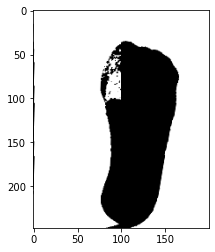

In [32]:
v_img = cv.hconcat([imgc2, imgc]

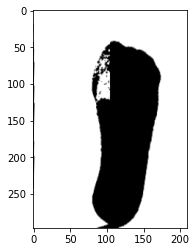

In [27]:
v_imgr = cv.resize(v_img, (widthImg, heightImg))
plt.imshow(v_imgr, cmap='gray')

In [82]:
imgThreshold3 = cv.Canny(v_imgr,thres[0],thres[1])
imgDial3 = cv.dilate(imgThreshold3, kernel, iterations=1) # APPLY DILATION
imgThreshold3 = cv.erode(imgDial3, kernel, iterations=1)  # APPLY EROSION

imgContours3 = v_imgr.copy()

In [100]:
colorim = cv.cvtColor(v_imgr, cv.COLOR_GRAY2BGR)
contours3, hierarchy3 = cv.findContours(imgThreshold3, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) # FIND ALL CONTOURS



True

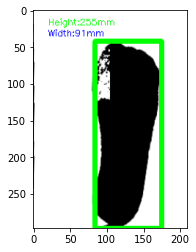

In [101]:
font = cv.FONT_HERSHEY_SIMPLEX
position = (20,20)
position2 = (20,35)
fontScale = 0.4
fontColor = (0,255,0)
fontColor2 = (0,0,255)
lineType = 1

for cnt in contours3:
        area = cv.contourArea(cnt)
        if area>500:
            peri = cv.arcLength(cnt, True)
            approx = cv.approxPolyDP(cnt, 0.02*peri, True)
            x_, y_, w, h = cv.boundingRect(approx)
            cv.rectangle(colorim, (x_,y_), (x_+ w, y_+ h), (0,255,0), 5)
            cv.putText(colorim,'Height:' +str(h)+'mm', position, font, fontScale,fontColor,lineType)
            cv.putText(colorim,'Width:' +str(w)+'mm', position2, font, fontScale,fontColor2,lineType)
            
            #cv.imshow('gr', b)
            #cv.waitKey(0)
            #cv.destroyAllWindows()
#print("Width in mm", w)
#print("Height in mm", h)
plt.imshow(colorim)
cv.imwrite("F10915104.jpg", colorim)